In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

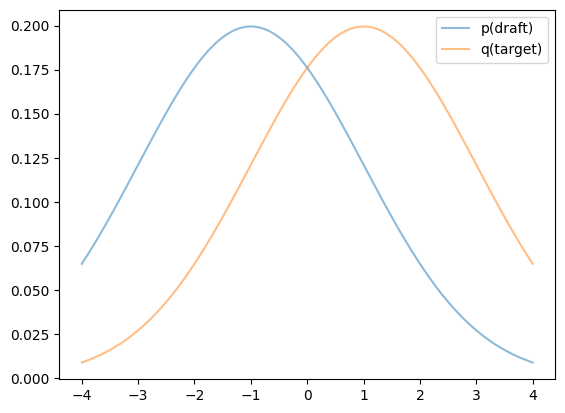

In [2]:
np.random.seed(31)

def make_gaussian(mean, std):
    return lambda x: 1./(std*(2*np.pi)**0.5) * np.exp(-(x-mean)**2/(2*std**2))

N = 10000
X = np.arange(-4, 4, 1/N)
q_density = make_gaussian(1, 2)
p_density = make_gaussian(-1, 2)
q = np.array([q_density(x) for x in X])
p = np.array([p_density(x) for x in X])
    
plt.plot(X, p, label="p(draft)", alpha=0.5)
plt.plot(X, q, label="q(target)", alpha=0.5)
plt.legend()
plt.show()

### reject sampling

scale factor: 7.388686655424241


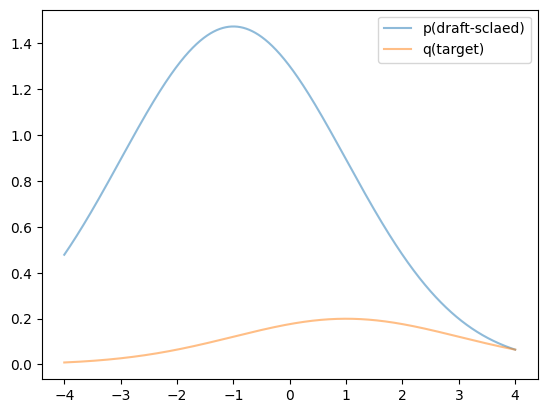

In [3]:
scale_factor = (q / p).max()
print(f"scale factor: {scale_factor}")
plt.plot(X, p * scale_factor, label="p(draft-sclaed)", alpha=0.5)
plt.plot(X, q, label="q(target)", alpha=0.5)
plt.legend()
plt.show()

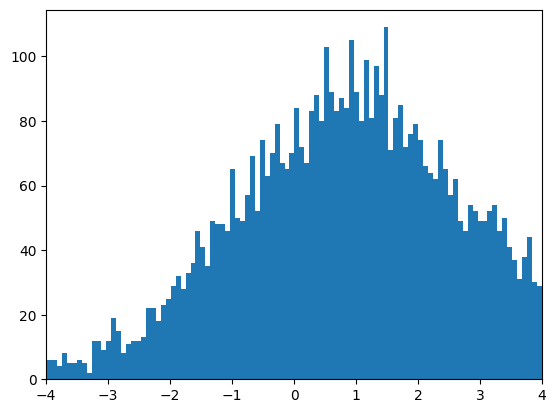

In [4]:
def normalize(d):
    return d / d.sum()

num_samples = 5000

samples = []
while len(samples) < num_samples:
    x = np.random.choice(X, p=normalize(p))
    p_eval, q_eval = p_density(x), q_density(x)
    
    if np.random.uniform(0, 1) < q_eval / (p_eval * scale_factor):
        samples.append(x)
        
plt.xlim([-4, 4])
plt.hist(samples, bins=100)
plt.show()

### modified reject samping

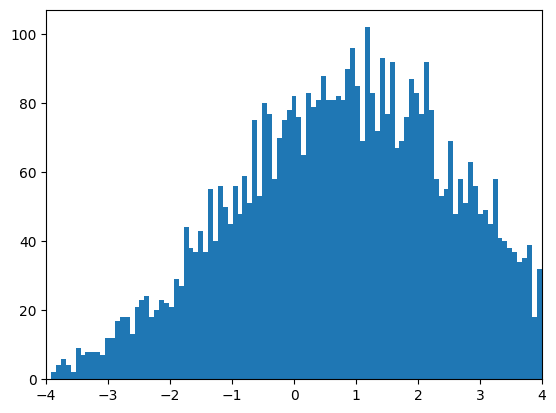

In [5]:
def normalize(d):
    return d / d.sum()

num_samples = 5000

samples = []
for _ in range(num_samples):
    # sample from p
    x = np.random.choice(X, p=normalize(p))
    p_eval, q_eval = p_density(x), q_density(x)
    if np.random.uniform(0, 1) < q_eval / p_eval:  # accept
        samples.append(x)
    else: # reject. resample from max(0, q - p)
        x = np.random.choice(X, p=normalize(np.maximum(q-p, 0)))
        samples.append(x)
        
plt.xlim([-4, 4])
plt.hist(samples, bins=100)
plt.show()